# Concensus NMF running script

#### similar as described by cNMF team on github: https://github.com/dylkot/cNMF/blob/master/Tutorials/analyze_pbmc_example_data.ipynb

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
#from IPython.display import Imaged
import scanpy as sc
from cnmf import cNMF
import anndata as ad

np.random.seed(42)

In [2]:
all_count = pd.read_csv('../../local_spatialDM/data/livcan_counts_y4_x69.csv')
all_meta = pd.read_csv('../../../arturito_local/final_R_part/liver/data/livcan_meta_y4_x69_withClusters_0327.csv')
all_raw = pd.read_csv('../../local_spatialDM/data/livcan_raw_counts_y4_x69-1.csv')
all_count.head()

,AATK,ABL1,ABL2,ACACB,ACE,ACKR1,ACKR3,ACKR4,ACP5,ACTA2,...,WNT7A,WNT7B,WNT9A,XBP1,XCL1,XKR4,YBX3,YES1,ZBTB16,ZFP36
0,0.873008,-0.899111,-0.761059,-1.339173,0.568835,-0.555687,-0.683929,0.784943,0.059660,-0.857468,...,-0.467617,-0.686448,0.917134,-2.003820,1.273756,-0.395283,2.138706,0.332135,-1.831427,0.737800
1,-0.793585,-0.187628,-0.925050,0.176717,-0.914694,-0.675865,-0.831523,-0.826315,-1.173083,-1.041842,...,-0.568871,0.355286,0.499942,-1.246374,0.685614,-0.480947,-0.652747,0.903774,-0.998982,-1.820885
2,0.120180,-0.525507,-1.092105,-0.900105,-1.079920,-0.798552,-0.982008,-0.975875,0.743403,-1.229429,...,-0.672314,-0.985607,-0.918791,2.063357,0.207202,-0.568507,2.132701,-0.396364,-2.302735,1.978299
3,3.400688,-0.375407,-0.317463,-0.561453,-0.313883,-0.231536,-0.285158,-0.283361,2.070635,-0.357911,...,-0.194767,-0.286212,-0.266653,-0.848054,-0.379477,-0.164597,-0.805350,-0.352301,-0.957774,0.481391
4,-0.584347,0.428393,-0.681505,0.441121,0.803433,-0.497467,-0.612370,-0.608522,-0.865276,-0.767956,...,-0.418586,-0.614627,1.167544,-1.263150,-0.813996,-0.353815,2.256925,-0.755973,-1.553186,-0.504792


In [3]:
# get only tumor

## tumor snap clusters: (0,1,6,7,9,10,12,15)

tm_meta = all_meta.loc[all_meta.snapres1.isin([0,4,7,8,9,12,14,16,17,23,24]),:]
tm_counts = all_count.loc[all_meta.snapres1.isin([0,4,7,8,9,12,14,16,17,23,24]),:]
tm_raw = all_raw.loc[all_meta.snapres1.isin([0,4,7,8,9,12,14,16,17,23,24]),:]
#tm_raw = tm_raw + 0.001
#tm_meta.shape
print([tm_meta.shape, tm_counts.shape, tm_raw.shape])

[(24690, 70), (24690, 1000), (24690, 1000)]


In [4]:
#tm_raw_sub = tm_raw.loc[:,tm_raw.var()> np.quantile(tm_raw.var(), 0.9)].copy()
#tm_raw_sub.shape

In [5]:
liver_tm = ad.AnnData(
    tm_raw.to_numpy(), dtype=np.float32
)
# author suggest no additional normalization
#sc.pp.normalize_total(liver_tm)
#sc.pp.log1p(liver_tm)
liver_tm

save = '../data/counts_livertumor_0328_2.h5ad'
sc.write(save, liver_tm)

In [6]:
numiter=200 # Number of NMF replicates. Set this to a larger value ~200 for real data. We set this to a relatively low value here for illustration at a faster speed
numhvgenes=900 ## Number of over-dispersed genes to use for running the actual factorizations

## Results will be saved to [output_directory]/[run_name] which in this example is example_PBMC/cNMF/pbmc_cNMF
output_directory = '../data/cnmf_0325/'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
run_name = 'cnmf_res1'

## Specify the Ks to use as a space separated list in this case "5 6 7 8 9 10"
K = ' '.join([str(i) for i in range(10,31, 5)])

seed = 42 ## Specify a seed pseudorandom number generation for reproducibility

In [7]:
K

'10 15 20 25 30'

In [8]:
## Initialize the cnmf object that will be used to run analyses
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [9]:
## Prepare the data, I.e. subset to 2000 high-variance genes, and variance normalize
cnmf_obj.prepare(counts_fn=save, components=25, # already tested, 25 is the best
                 n_iter=numiter, seed=seed, num_highvar_genes=numhvgenes)

In [10]:
## Specify that the jobs are being distributed over a single worker (total_workers=1) and then launch that worker
# this took 2 hours
cnmf_obj.factorize(worker_i=0, total_workers=1)

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 42.
[Worker 0]. Starting task 43.
[Worker 0]. Starting task 44.
[Worker 0]. Starting task 45.
[Worker 0]. Starting task 46.
[Worker 0]. Starting task 47.
[Worker 0]. Starting task 48.
[Worker 0]. Starting task 49.
[Worker 0]. Starting task 50.
[Worker 0]. Starting task 51.
[Worker 0]. Starting task 52.
[Worker 0]. Starting task 53.
[Worker 0]. Starting task 54.
[Worker 0]. Starting task 55.
[Worker 0]. Starting task 56.
[Worker 0]. Starting task 57.
[Worker 0]. Starting task 58.
[Worker 0]. Starting task 59.
[Worker 0]. Starting task 60.
[Worker 0]. Starting task 61.
[Worker 0]. Starting task 62.
[Worker 0]. Starting task 63.
[Worker 0]. Starting task 64.
[Worker 0]. Starting task 65.
[Worker 0]. Starting task 66.
[Worker 0]. Starting task 67.
[Worker 0]. Starting task 68.
[Worker 0]. Starting task 69.
[Worker 0]. Starting task 70.
[Worker 0]. Starting task 71.
[Worker 0]. Starting task 72.
[Worker 0]. Starting task 73.
[Worker 0]. Starting task 74.
[Worker 0]

/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 87.
[Worker 0]. Starting task 88.
[Worker 0]. Starting task 89.
[Worker 0]. Starting task 90.
[Worker 0]. Starting task 91.
[Worker 0]. Starting task 92.
[Worker 0]. Starting task 93.
[Worker 0]. Starting task 94.
[Worker 0]. Starting task 95.
[Worker 0]. Starting task 96.
[Worker 0]. Starting task 97.
[Worker 0]. Starting task 98.
[Worker 0]. Starting task 99.
[Worker 0]. Starting task 100.
[Worker 0]. Starting task 101.
[Worker 0]. Starting task 102.
[Worker 0]. Starting task 103.
[Worker 0]. Starting task 104.
[Worker 0]. Starting task 105.
[Worker 0]. Starting task 106.
[Worker 0]. Starting task 107.
[Worker 0]. Starting task 108.
[Worker 0]. Starting task 109.
[Worker 0]. Starting task 110.
[Worker 0]. Starting task 111.
[Worker 0]. Starting task 112.
[Worker 0]. Starting task 113.
[Worker 0]. Starting task 114.
[Worker 0]. Starting task 115.
[Worker 0]. Starting task 116.
[Worker 0]. Starting task 117.
[Worker 0]. Starting task 118.
[Worker 0]. Starting 

/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 186.
[Worker 0]. Starting task 187.
[Worker 0]. Starting task 188.
[Worker 0]. Starting task 189.
[Worker 0]. Starting task 190.
[Worker 0]. Starting task 191.
[Worker 0]. Starting task 192.
[Worker 0]. Starting task 193.
[Worker 0]. Starting task 194.
[Worker 0]. Starting task 195.
[Worker 0]. Starting task 196.
[Worker 0]. Starting task 197.
[Worker 0]. Starting task 198.
[Worker 0]. Starting task 199.


In [11]:
cnmf_obj.combine(skip_missing_files=True)

Combining factorizations for k=25.


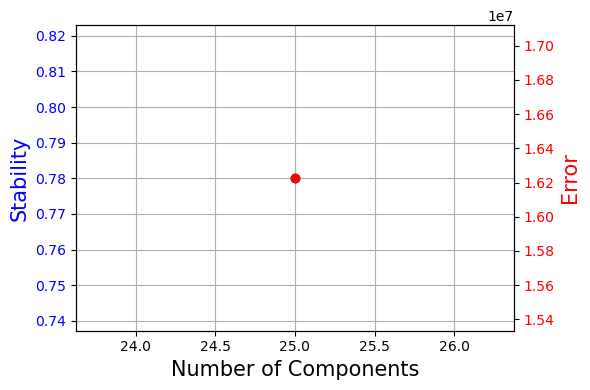

In [12]:
## previouslly tested 15-40; confirmed 25 is the best value
cnmf_obj.k_selection_plot(close_fig=False)
# still 25

In [13]:
selected_K = 25
density_threshold = 2.00

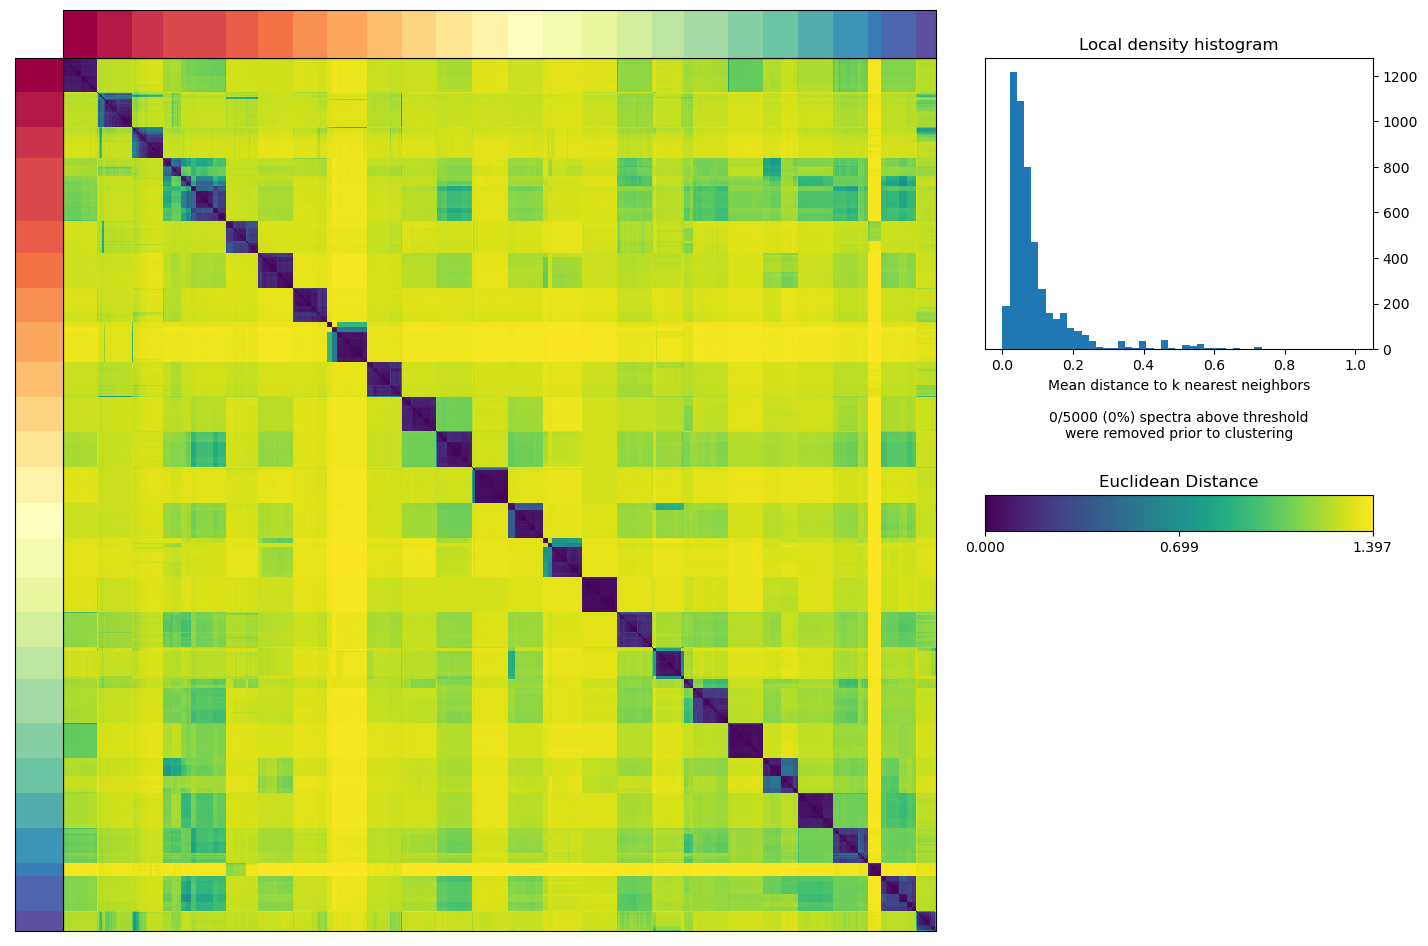

In [14]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)


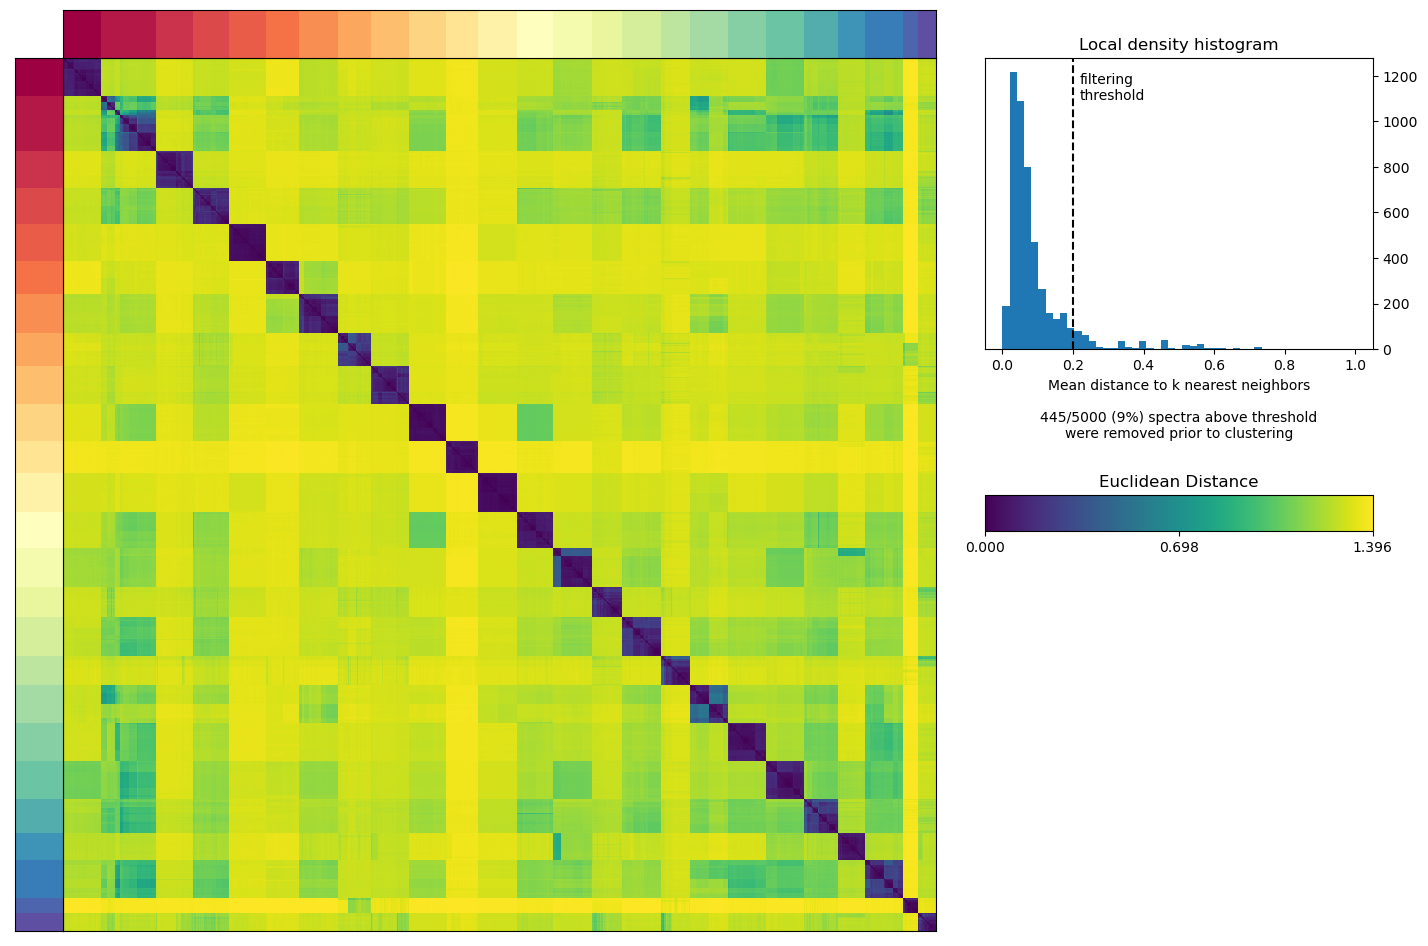

In [15]:
density_threshold = 0.2
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)


Load cnmf results??

In [16]:
usage_norm, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=selected_K, density_threshold=density_threshold)
usage_norm.columns = ['Usage_%d' % i for i in usage_norm.columns]
usage_norm

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7,Usage_8,Usage_9,Usage_10,...,Usage_16,Usage_17,Usage_18,Usage_19,Usage_20,Usage_21,Usage_22,Usage_23,Usage_24,Usage_25
0,0.060416,0.051182,0.112572,0.063100,0.037423,0.066834,0.116579,0.034741,0.029984,0.034333,...,0.053486,0.007626,0.008779,0.000000,0.015981,0.000000,0.028340,0.002514,0.010813,0.001894
1,0.133441,0.053417,0.020994,0.014257,0.019860,0.016718,0.277662,0.012872,0.026653,0.013208,...,0.105040,0.061096,0.000000,0.009241,0.002287,0.006178,0.000000,0.006718,0.002232,0.005950
2,0.056864,0.061726,0.036115,0.042413,0.008021,0.016671,0.211508,0.000000,0.018619,0.011016,...,0.172256,0.044905,0.055638,0.010129,0.003362,0.020547,0.015317,0.003180,0.011210,0.001252
3,0.316204,0.000000,0.000000,0.101339,0.035765,0.000000,0.154290,0.105565,0.034760,0.012743,...,0.043621,0.012833,0.017602,0.044812,0.000000,0.007346,0.002324,0.001832,0.003161,0.004695
4,0.083371,0.086384,0.003789,0.095082,0.059323,0.055720,0.089044,0.016920,0.000000,0.031499,...,0.184403,0.080308,0.000000,0.012086,0.006051,0.006371,0.012369,0.010952,0.000000,0.000158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,0.000000,0.000000,0.087874,0.000000,0.393394,0.000000,0.000000,0.179874,0.086786,0.006307,...,0.000000,0.000000,0.026494,0.000000,0.009473,0.079525,0.000000,0.026519,0.000000,0.000000
24686,0.107658,0.000000,0.000000,0.000000,0.000000,0.000000,0.007755,0.288421,0.000000,0.009295,...,0.094164,0.002130,0.084833,0.000000,0.025999,0.170332,0.140800,0.034838,0.012733,0.000000
24687,0.000000,0.000000,0.000000,0.000000,0.046752,0.109653,0.000000,0.000000,0.249717,0.050815,...,0.000000,0.000000,0.000000,0.128279,0.029694,0.030236,0.080171,0.000000,0.017496,0.000296
24688,0.000000,0.071485,0.000000,0.000000,0.000000,0.401479,0.372356,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001899


In [17]:
usage_norm.to_csv('../data/tumor_cnmf25_usage_0327.csv')

In [18]:
dd = {}
genelist = all_count.columns.tolist()
for i in range(25):
    dd[i] = []
    #print(i)
    for j in range(100):
        #print(j)
        id = int(topgenes.iloc[j,i])
        gene = genelist[id]
        dd[i].append(gene)
df = pd.DataFrame.from_dict(dd)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,S100A10,SPINK1,IFNL3,NEAT1,LEFTY1,NPR2,APOA1,KRT8,LAG3,PDCD1,...,SLPI,UBE2C,MT1X,CXCL1,COL4A1,CXCL10,COL6A2,CCL5,IGHG1,HBA1
1,ATP5F1E,GC,CCR10,MALAT1,XCL1,TPM2,TTR,CRYAB,LPAR5,GPBAR1,...,S100A9,TOP2A,MT2A,CCL20,COL4A2,CXCL9,COL6A1,OASL,IGHG2,HBB
2,SELENOP,FGG,NGFR,ZBTB16,S100A2,COL5A1,VTN,S100A6,KRT6A,CXCR1,...,PSAP,TUBB4B,SERPINA3,CXCL8,IGFBP7,TAP1,MMP7,ISG15,IGHM,LEFTY1
3,IL32,FN1,CCL3,COL27A1,EFNA4,PTGES,APOE,TAGLN,RARG,DUSP2,...,GPX3,HMGN2,SOD2,GDF15,COL1A2,STAT1,BGN,MX1,IGKC,ANGPT2
4,SQSTM1,REG1A,C5AR2,TPM2,IL24,FABP4,APOC1,KRT18,HCAR2,LINC01857,...,IFI6,NUSAP1,SERPINA1,FOS,RGS5,IDO1,ITGA3,OAS2,JCHAIN,CLEC5A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,YBX3,YES1,NR1H2,HDAC4,ADGRG1,SOX2,BMP1,TIMP1,CCR1,FN1,...,ITM2A,ZBTB16,TNFRSF10A,HIF1A,ITGA9,CD70,EPHB6,CCR1,FHIT,CSF1R
96,PPIA,TGFBR2,RPL21,CIITA,ADGRL4,IL17B,ITGAL,CD24,BCL2,AREG,...,CHEK2,HSP90AB1,CYTOR,SRSF2,JAG1,ATM,CCDC80,PTGDR2,PHLDA2,COL11A1
97,TIMP1,ERBB3,P2RX5,ABL1,COTL1,ITGB8,TSHZ2,TGFBR2,IGHD,CRIP1,...,SH3BGRL3,NFKB1,PSD3,S100A2,CACNA1C,CD274,PSCA,CD52,TLR2,FGR
98,FGF18,HDAC1,KRT15,ITGA5,GLUL,ACKR4,CAV1,SAT1,RPS4Y1,RPL21,...,LAIR1,ACVRL1,COL11A1,IFNGR1,CD48,NKG7,CD58,RARRES1,TNFSF13B,RARB


In [19]:
df.to_csv('../data/top100g_tumor_cnmf25_0327.csv', index = False)

In [20]:
## also consider saving the gene_spectra_score
gep_scores.index = all_count.columns
gep_scores.to_csv('../data/gep_spectra_cnmf25_0327.csv')
gep_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
AATK,-0.000497,0.000005,0.002568,-0.000034,0.000186,0.000019,-0.000199,-0.000142,-0.000082,-0.000452,...,-0.000151,-0.000232,-0.000035,-0.000125,0.000613,-0.000302,-0.000292,-0.000396,-0.000830,0.000043
ABL1,-0.000511,0.000366,0.000008,0.001004,0.000250,0.002485,-0.001151,0.000465,-0.000574,-0.000553,...,-0.000223,-0.000125,-0.000275,-0.000305,-0.000238,-0.000526,-0.000032,0.000256,-0.000283,0.000856
ABL2,-0.000354,0.000117,-0.000091,0.000404,0.001748,-0.000166,-0.000636,0.000423,-0.000203,0.000318,...,-0.000441,0.000096,-0.000023,0.000237,0.000139,0.000113,-0.000067,0.000163,-0.000210,0.000390
ACACB,-0.000995,-0.000103,-0.000490,0.004574,-0.000891,-0.000506,0.000402,-0.000665,0.004928,-0.001210,...,-0.000351,-0.000895,-0.000608,-0.001012,-0.000246,-0.000739,-0.000816,0.000296,-0.001258,-0.000250
ACE,-0.000151,0.000044,0.001022,0.000292,-0.000120,0.000034,-0.000490,-0.000225,-0.000020,0.000303,...,-0.000260,-0.000686,-0.000142,-0.000285,-0.000046,-0.000524,0.000139,-0.000157,-0.000544,-0.000901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKR4,-0.000072,-0.000354,0.000439,-0.000368,-0.000280,0.001076,-0.000373,-0.000225,0.000826,0.000070,...,0.000042,-0.000107,0.000179,-0.000083,0.000597,-0.000245,-0.000287,-0.000411,-0.000680,0.000287
YBX3,0.000617,0.000127,-0.001079,0.000293,-0.000874,-0.000376,-0.003022,0.001336,0.000237,-0.000303,...,0.001098,0.000052,0.002163,0.001530,0.000371,0.000159,0.000787,-0.001382,-0.000922,-0.001231
YES1,0.000166,0.000699,0.000008,-0.000173,-0.000089,0.000007,-0.000529,0.000359,-0.000020,0.000363,...,-0.000180,0.000241,-0.000114,0.000026,-0.000135,0.000138,0.000309,0.000092,-0.000692,-0.000331
ZBTB16,-0.001490,0.000562,-0.001209,0.005408,-0.001043,-0.000339,-0.002160,-0.000647,-0.000710,-0.000611,...,-0.001694,0.000328,0.000004,-0.000204,-0.000821,-0.000047,-0.001207,-0.000116,-0.000267,-0.000086
